In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data in

In [19]:
df_ei_i = pd.read_csv('events_info.csv')
df_ei = df_ei[['Event Name', 'Date', 'Location', 'Attendance']]
df_ei.head(2)

,Event Name,Date,Location,Attendance
0,UFC 234: Adesanya vs. Silva,02/09/2019,"Melbourne, Victoria, Australia",15238.0
1,UFC Fight Night: Assuncao vs. Moraes 2,02/02/2019,"Fortaleza, Ceara, Brazil",10040.0


In [18]:
df_ef_i = pd.read_csv('events_fights.csv')
df_ef = df_ef_i[['Event Name', 'Winner', 'Loser', 'Weight Class']]
df_ef.head(2)

,Event Name,Winner,Loser,Weight Class
0,UFC 234: Adesanya vs. Silva,Israel Adesanya,Anderson Silva,Middleweight
1,UFC 234: Adesanya vs. Silva,Lando Vannata,Marcos Mariano,Lightweight


In [22]:
df_fi_i = pd.read_csv('fighters_info.csv')
df_fi = df_fi_i[['Name', 'Nickname', 'Record', 'Height', 'Weight', 'Reach','Stance', 'DOB', 'SLpM', 'Str_Acc', 'SApM', 'Str_Def', 'TD_Avg','TD_Acc', 'TD_Def', 'Sub. Avg']]
df_fi.head(2)

,Name,Nickname,Record,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub. Avg
0,Israel Adesanya,The Last Stylebender,16-0-0,76,185,80,Switch,07/22/1989,4.47,53,2.07,69,0.00,0,85,0.2
1,Anderson Silva,The Spider,34-9-0,74,185,77,Southpaw,04/14/1975,3.06,62,1.96,61,0.53,77,69,0.8


In [23]:
df_ff_i = pd.read_csv('fighters_fights.csv')
df_ff = df_ff_i[['f1', 'f2', 'Event', 'Date', 'f1.result', 'f1.str','f2.str', 'f1.td', 'f2.td', 'f1.sub', 'f2.sub', 'f1.pass', 'f2.pass','Method', 'Round', 'Time']]
df_ff.head(2)

,f1,f2,Event,Date,f1.result,f1.str,f2.str,f1.td,f2.td,f1.sub,f2.sub,f1.pass,f2.pass,Method,Round,Time
0,Israel Adesanya,Anderson Silva,UFC 234: Adesanya vs. Silva,02/09/2019,win,65,31,0,0,0,0,0,0,U-DEC,3,300
1,Israel Adesanya,Derek Brunson,UFC 230: Cormier vs. Lewis,11/03/2018,win,13,3,0,0,0,0,0,0,KO/TKO,1,291


# General Stats

## From events info

In [24]:
df_ei.head()

,Event Name,Date,Location,Attendance
0,UFC 234: Adesanya vs. Silva,02/09/2019,"Melbourne, Victoria, Australia",15238.0
1,UFC Fight Night: Assuncao vs. Moraes 2,02/02/2019,"Fortaleza, Ceara, Brazil",10040.0
2,UFC Fight Night: Cejudo vs. Dillashaw,01/19/2019,"Brooklyn, New York, USA",12152.0
3,UFC 232: Jones vs. Gustafsson 2,12/29/2018,"Los Angeles, California, USA",15862.0
4,UFC Fight Night: Lee vs. Iaquinta,12/15/2018,"Milwaukee, Wisconsin, USA",9010.0


In [207]:
df_ei['Date'] = pd.to_datetime(df_ei['Date'])

In [59]:
df_ei_nz = df_ei[df_ei.Attendance > 0 ]

In [84]:
df_ei_early = df_ei_nz[df_ei_nz.Date < '2003-01-01']
df_ei_middle = df_ei_nz[(df_ei_nz.Date > '2003-01-01') & (df_ei_nz.Date < '2013-01-01')]
df_ei_recent = df_ei_nz[df_ei_nz.Date > '2013-01-01']

### Evolution of events' attendance

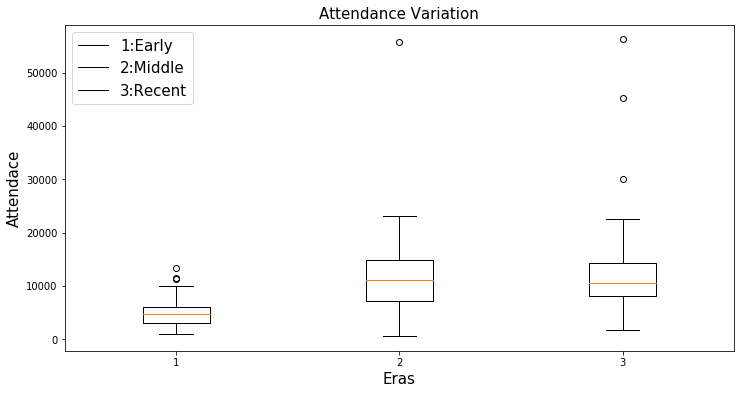

In [198]:
fig, ax = plt.subplots(figsize= (12,6))
#ax.hist(df_ei_nz['Attendance'], bins = 100)
ax.set_title("Attendance Variation", fontsize =15)
ax.set_ylabel("Attendace", fontsize =15)
ax.set_xlabel("Eras", fontsize =15)
ax.boxplot([df_ei_early.Attendance, df_ei_middle.Attendance, df_ei_recent.Attendance])
ax.legend(['1:Early', '2:Middle', '3:Recent'], fontsize =15)

fig.show()

### The Ronda Rousey fight in late 2015 holds the record attendance for the UFC.

In [208]:
df_ei[df_ei.Attendance ==df_ei.Attendance.max()]

,Event Name,Date,Location,Attendance,Country
128,UFC 193: Rousey vs Holm,2015-11-14,"Melbourne, Victoria, Australia",56214.0,Australia


In [94]:
df_test = df_ei

In [96]:
df_test['Country'] = df_test.Location.map(lambda x :x.split(',')[-1])

In [209]:
df_ct = df_test.groupby(by='Country').count()

### No surprises here. The US holds the record for more events.

No handles with labels found to put in legend.
/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


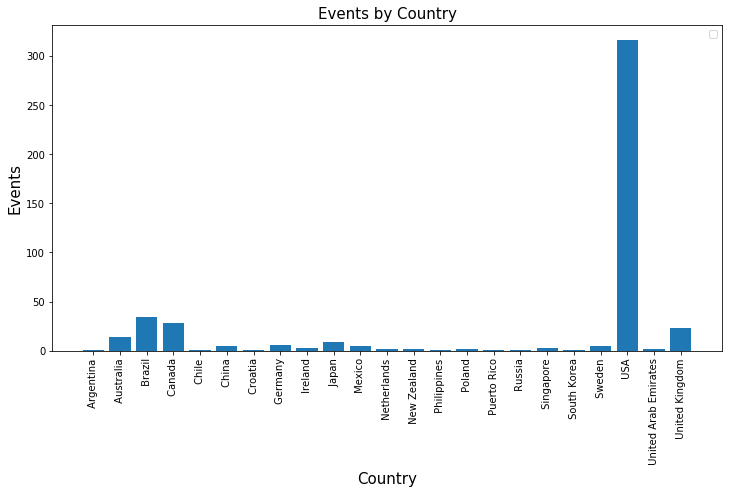

In [210]:
fig, ax = plt.subplots(figsize= (12,6))
ax.bar(df_ct.index, df_ct.Date)
ax.set_title("Events by Country", fontsize = 15)
ax.set_ylabel("Events", fontsize = 15)
ax.set_xlabel("Country", fontsize = 15)
plt.xticks(df_ct.index, rotation='vertical')
ax.legend()
fig.show()

In [182]:
df_n_us = df_test[df_test['Country'] != ' USA']
df_n_us = df_n_us.groupby(by='Country').count()
n = df_n_us.sort_values(by="Date", ascending=False)

### Top 5 countries for more events

No handles with labels found to put in legend.


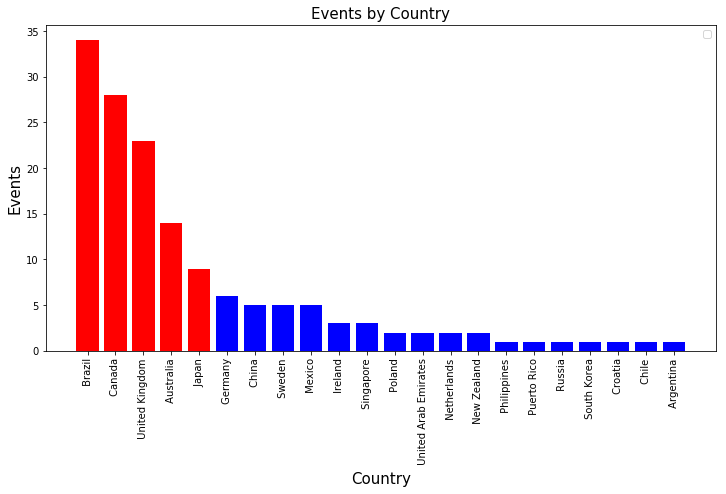

In [276]:
fig, ax = plt.subplots(figsize= (12,6))
ax.bar(n.index, n.Date, color= 'rrrrrbbbbbbbbbbbbbbbbb')
ax.set_title("Events by Country", fontsize = 15)
ax.set_ylabel("Events", fontsize = 15)
ax.set_xlabel("Country", fontsize = 15)
plt.xticks(n.index, rotation='vertical')
ax.legend()
fig.show()

### <span style="color:red">- Is there a relationship for events and number of fighters born in those countires????? </span>

# From the events fights

In [213]:
df_ef.head(10)

,Event Name,Winner,Loser,Weight Class
0,UFC 234: Adesanya vs. Silva,Israel Adesanya,Anderson Silva,Middleweight
1,UFC 234: Adesanya vs. Silva,Lando Vannata,Marcos Mariano,Lightweight
2,UFC 234: Adesanya vs. Silva,Ricky Simon,Rani Yahya,Bantamweight
3,UFC 234: Adesanya vs. Silva,Montana De La Rosa,Nadia Kassem,Women's Flyweight
4,UFC 234: Adesanya vs. Silva,Jimmy Crute,Sam Alvey,Light Heavyweight
5,UFC 234: Adesanya vs. Silva,Devonte Smith,Dong Hyun Ma,Lightweight
6,UFC 234: Adesanya vs. Silva,Shane Young,Austin Arnett,Featherweight
7,UFC 234: Adesanya vs. Silva,Kai Kara-France,Raulian Paiva,Flyweight
8,UFC 234: Adesanya vs. Silva,Kyung Ho Kang,Teruto Ishihara,Bantamweight
9,UFC 234: Adesanya vs. Silva,Jalin Turner,Callan Potter,Lightweight


In [ ]:
# meannumber of fights by event
# weight class with the most fights
#fighter with the most fights in the UFC

In [215]:
df_by_ev = df_ef.groupby(by= 'Event Name').count()

In [224]:
df_by_ev.sort_values(by ='Winner', ascending=False).head(1)

,Winner,Loser,Weight Class
Event Name,,,
UFC Fight Night: Belfort vs Henderson,24,24,24


### Distribution of the number of fighters per event. Mean of 10.73 fights per event

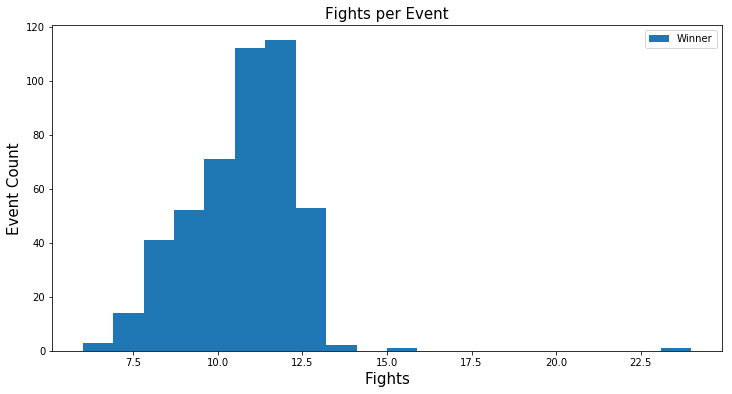

In [245]:
fig, ax = plt.subplots(figsize= (12,6))
ax.hist(df_by_ev.Winner, bins = 20)
ax.set_title("Fights per Event", fontsize = 15)
ax.set_ylabel("Event Count", fontsize = 15)
ax.set_xlabel("Fights", fontsize = 15)
#plt.xticks(n.index, rotation='vertical')
ax.legend()
fig.show()

In [226]:
df_by_ev.Winner.mean()

10.731182795698924

In [249]:
df_by_wc = df_ef.groupby(by= 'Weight Class').count()
df_wc = df_by_wc.sort_values(by= 'Winner', ascending=False)

No handles with labels found to put in legend.


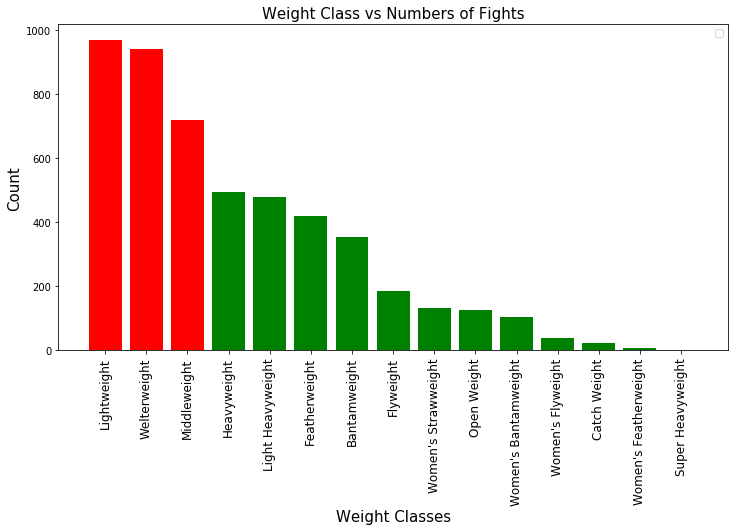

In [271]:
fig, ax = plt.subplots(figsize= (12,6))
ax.bar(df_wc.index, df_wc.Winner, color= 'rrrggggggggggg')
ax.set_title("Weight Class vs Numbers of Fights", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)
ax.set_xlabel("Weight Classes", fontsize = 15)
plt.xticks(df_wc.index, rotation='vertical', fontsize = 12)
ax.legend()
fig.show()

### <span style="color:red"> - Are there more lightweight figters in the roster??? </span>

# From the Fighters info

In [258]:
df_fi.head()

,Name,Nickname,Record,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub. Avg
0,Israel Adesanya,The Last Stylebender,16-0-0,76,185,80,Switch,07/22/1989,4.47,53,2.07,69,0.00,0,85,0.2
1,Anderson Silva,The Spider,34-9-0,74,185,77,Southpaw,04/14/1975,3.06,62,1.96,61,0.53,77,69,0.8
2,Lando Vannata,Groovy,10-3-2,69,155,71,Orthodox,03/14/1992,4.96,43,5.19,54,1.62,44,70,0.6
3,Marcos Mariano,Dhalsim,6-5-0,73,155,0,Switch,10/12/1986,0.61,33,4.07,50,0.00,0,0,0.0
4,Ricky Simon,NaN,15-1-0,66,135,69,Orthodox,08/31/1992,2.68,40,3.10,69,6.75,52,73,0.2


In [262]:
df_fi_cl = df_fi[(df_fi.Stance != 'STANCE:') & (df_fi.Stance != 'Stance') & (df_fi.Stance != 'Sideways')]
df_by_st = df_fi_cl.groupby(by= 'Stance').count()
#df_wc = df_by_wc.sort_values(by= 'Winner', ascending=False)
df_by_st

,Name,Nickname,Record,Height,Weight,Reach,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub. Avg
Stance,,,,,,,,,,,,,,,
Orthodox,1369,911,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369
Southpaw,309,201,309,309,309,309,309,309,309,309,309,309,309,309,309
Switch,60,46,60,60,60,60,60,60,60,60,60,60,60,60,60


### By far, more ortodox stance fighters.

No handles with labels found to put in legend.


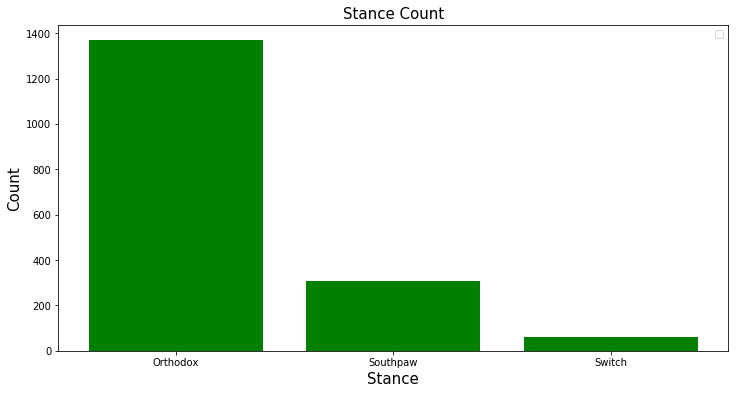

In [272]:
fig, ax = plt.subplots(figsize= (12,6))
ax.bar(df_by_st.index, df_by_st.Name, color= 'g')
ax.set_title("Stance Count", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)
ax.set_xlabel("Stance", fontsize = 15)
#plt.xticks(df_by_st.index, rotation='vertical', fontsize = 12)
ax.legend()
fig.show()

### Rather than creating hypothesis across division, I am mostly focusing on questions that can help predict the outcome of fights from fighters in the same division. 


In [279]:
df_fi['r_h_ratio']= df_fi.Reach/df_fi.Height

In [295]:
df_fi.r_h_ratio = df_fi.r_h_ratio.fillna(0)
df_rhr_cl = df_fi[(df_fi.r_h_ratio >0) & (df_fi.r_h_ratio <5)]
df_rhr_cl.head(1)

,Name,Nickname,Record,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub. Avg,r_h_ratio
0,Israel Adesanya,The Last Stylebender,16-0-0,76,185,80,Switch,07/22/1989,4.47,53,2.07,69,0.0,0,85,0.2,1.052632


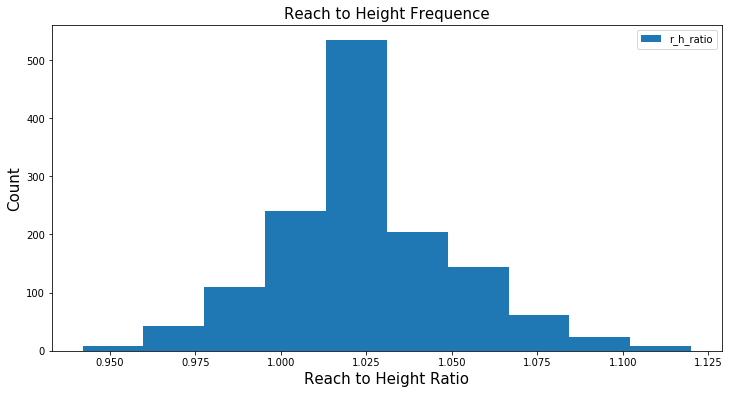

In [306]:
fig, ax = plt.subplots(figsize= (12,6))
ax.hist(df_rhr_cl.r_h_ratio)
ax.set_title("Reach to Height Frequence", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)
ax.set_xlabel("Reach to Height Ratio", fontsize = 15)
#plt.xticks(df_by_st.index, rotation='vertical', fontsize = 12)
ax.legend()
fig.show()

#### <span style="color:red">Null hypothesis 1: Fighters with higher reach to height ratio win more fights.</span>
#### <span style="color:red">Alt hypothesis 1: Fighters with higher reach to height ratio DO NOT win more fights.</span>
Take the top 10% reach to height ratio fighters and compare them with the rest
#### <span style="color:red">Null hypothesis 2: Fighters with Switch stance win more fights.</span>
#### <span style="color:red">Alt hypothesis 2: Fighters with Switch stance DO NOT win more fights.</span>
Take all Switch fighters and compare records with the none switch
#### <span style="color:red">Null hypothesis 3: Fighters with high takedown accuracy win more fights than fighters with high strike accuracy.</span>
#### <span style="color:red">Alt hypothesis 3: Fighters with high takedown accuracy DO NOT win more fights than fighters with high strike accuracy.</span>
Take the top 10% takedown accuracy fighters and compare them with the top 10%  strike accuracy fighters
#### <span style="color:red">Null hypothesis 4: Fighters 4 years (plus) younger than opponents win more fights. </span>
#### <span style="color:red">Alt hypothesis 4: Fighters 4 years (plus) younger than opponents DO NOT win more fights. </span>
Compare all the fightes with 4+ age difference.
#### <span style="color:red">Null hypothesis 5: Fighters fight, in avg., 4 fights per year.</span>
#### <span style="color:red">Alt hypothesis 5: Fighters DO NOT fight, in avg., 4 fights per year.</span>